In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, facet_wrap, labs
import seaborn as sns

In [82]:
# Read data from the file and store it in a list
data = []
with open('C:/Users/Cem/Documents/GitHub/Helmholtz-Workspace/Data-Descriptor/Cell-Level/scPower-wrapper/results/muscle/skeletal muscle/estimates_trimmed.txt', 'r') as file:
    for line in file:
        if line.strip():  # Ignore empty lines
            parts = line.strip().split()  # split by space
            if len(parts) == 2:  # check if there are two parts
                counted = int(parts[0])
                estimated = int(parts[1].replace(',', ''))  # remove the comma from the second part
                data.append((counted, estimated))

In [83]:
# Fill a list with the data dictionaries and corresponding labels
labels = ['Complete', 'Subsampled75', 'Subsampled50', 'Subsampled25']
data_entries = []
for i in range(0, len(data), 4):
    for j in range(4):  # grouping in sets of 4
        if i + j < len(data):  # Check if the index is within the range of the data list
            label = labels[j]
            data_entries.append({'Counted': data[i + j][0], 'Estimated': data[i + j][1], 'Label': label})

In [84]:
# Create a DataFrame to hold the data using pd.concat
df = pd.DataFrame(data_entries)

# Convert to numeric and handle non-numeric data
df['Counted'] = pd.to_numeric(df['Counted'], errors='coerce')
df['Estimated'] = pd.to_numeric(df['Estimated'], errors='coerce')
df = df.dropna()

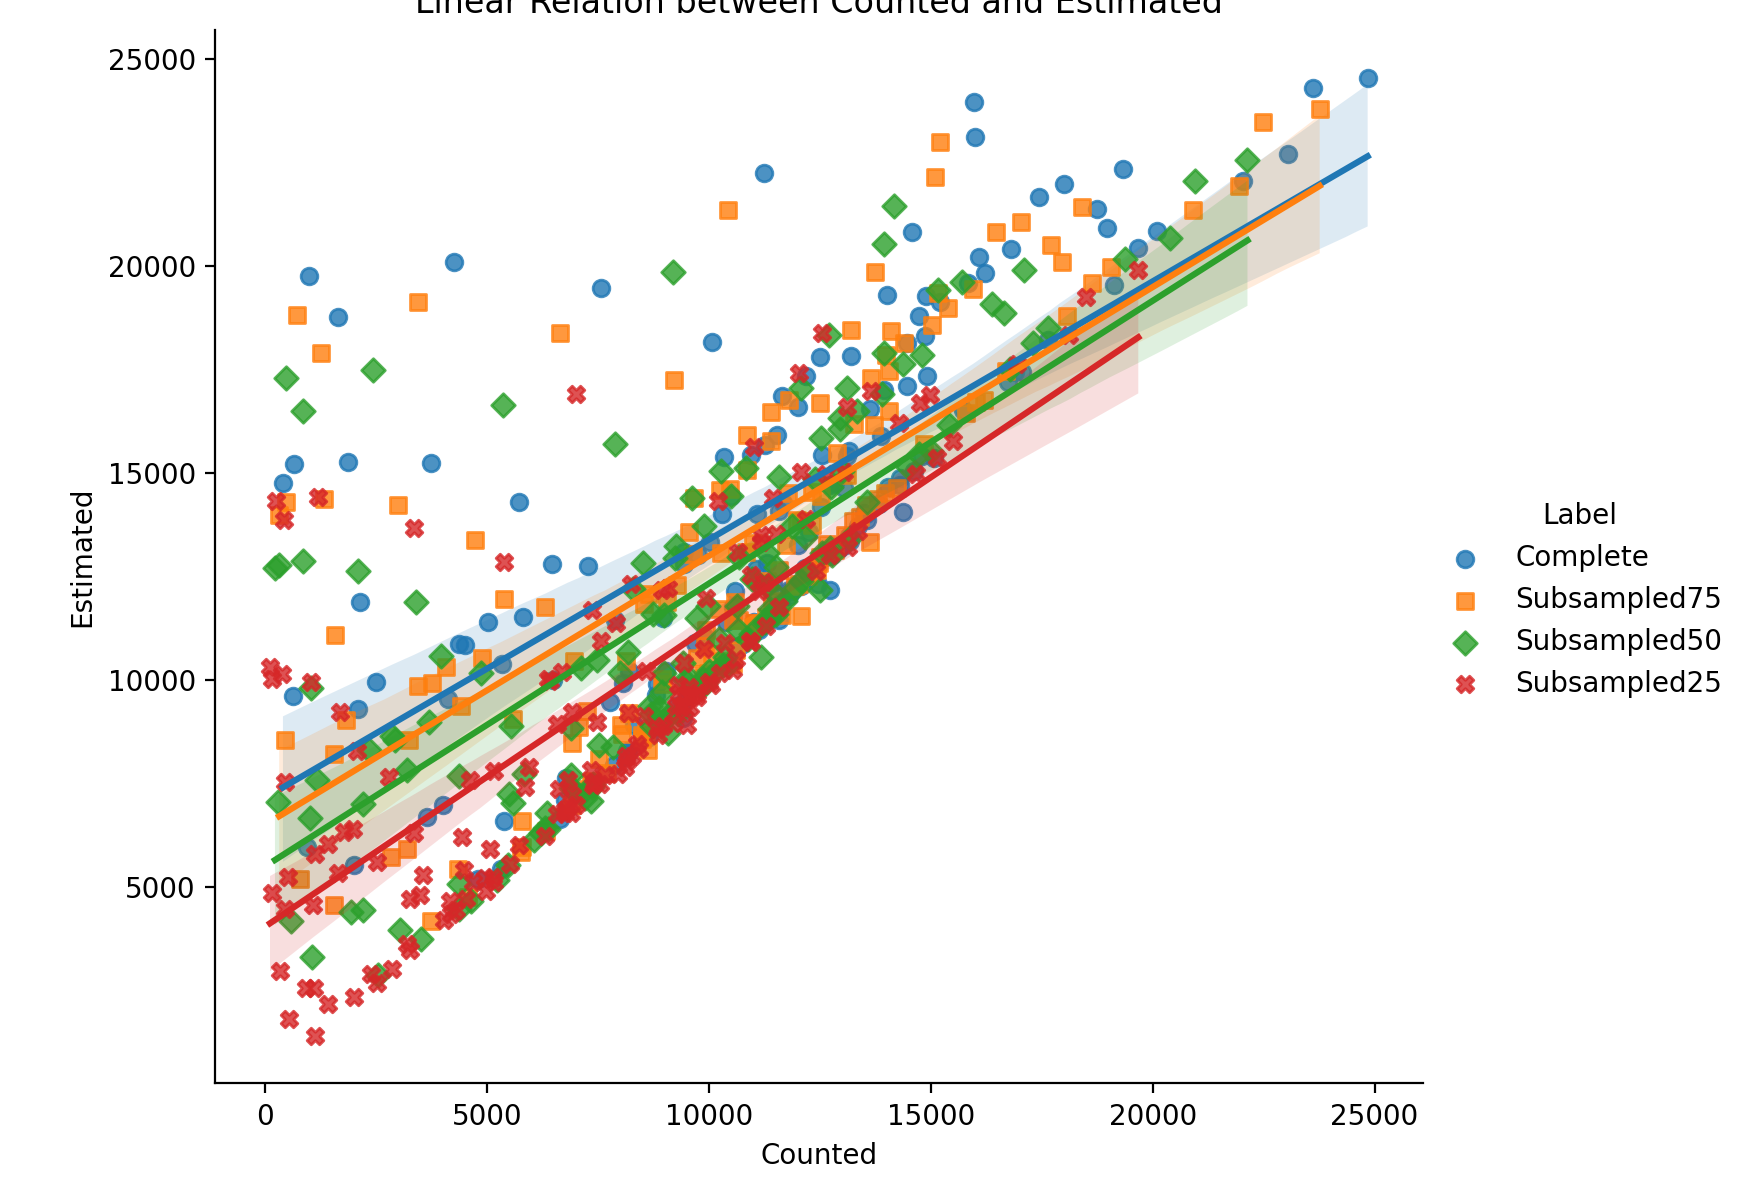

In [85]:
sns.lmplot(x='Counted', y='Estimated', data=df, hue='Label', markers=['o', 's', 'D', 'X'], height=6, aspect=1.2)
plt.title('Linear Relation between Counted and Estimated')
plt.show()

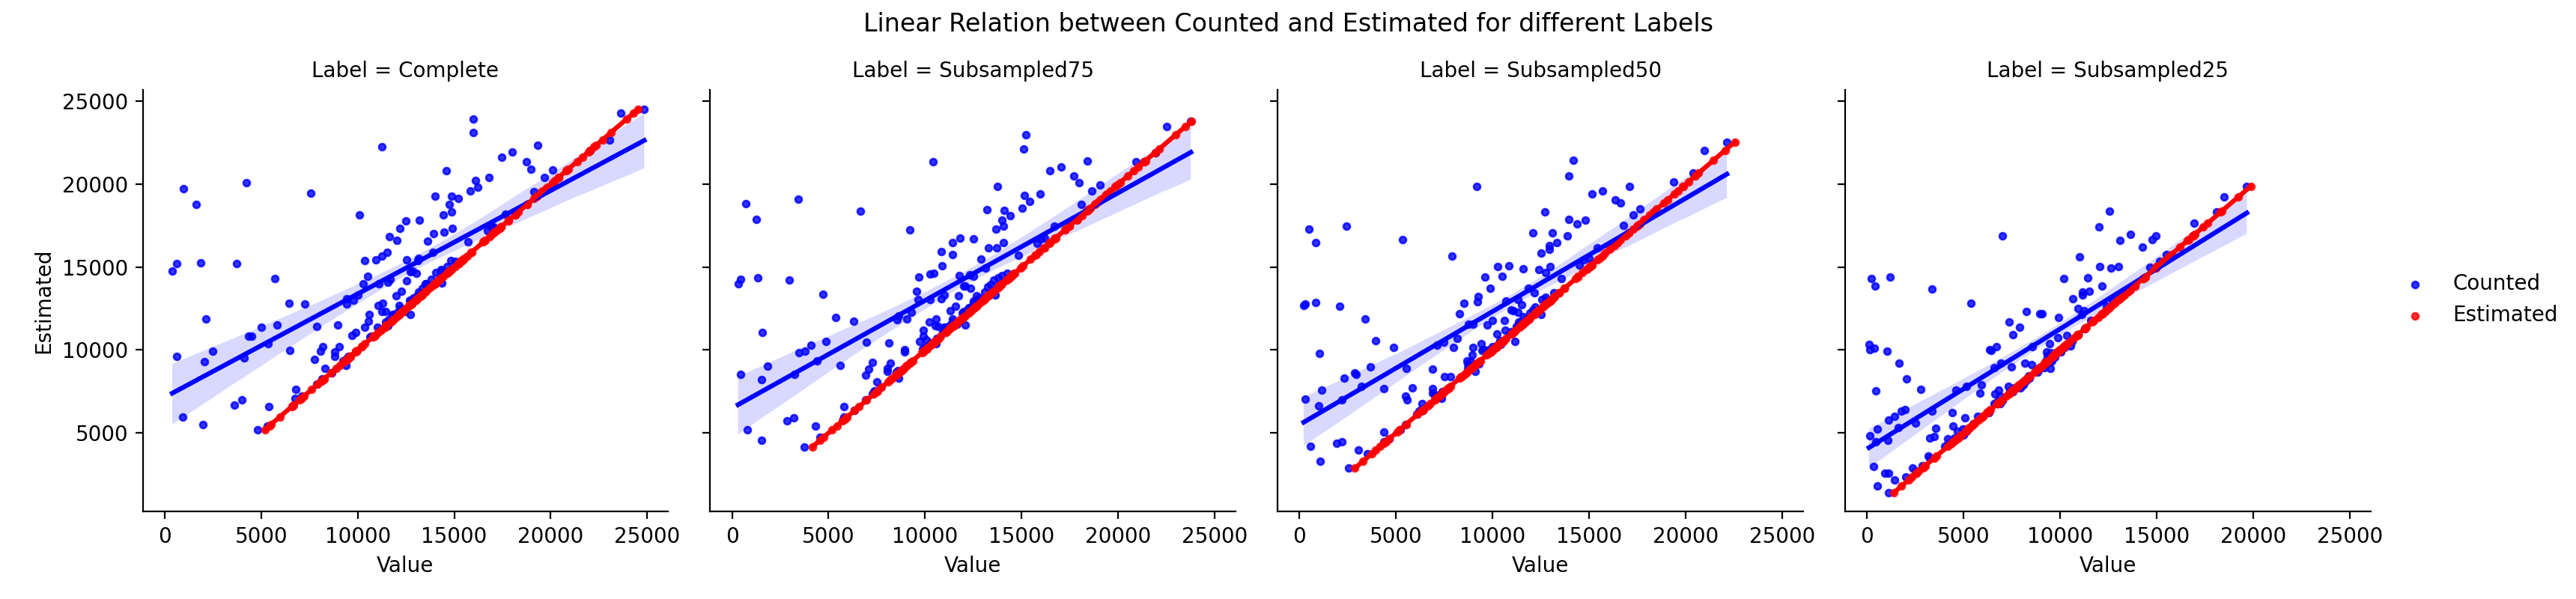

In [86]:
# Create a grid of plots with the 'Label' as a separator and plot 'Counted' and 'Estimated' as different linear lines
g = sns.FacetGrid(df, col="Label", height=4, aspect=1)
g.map(sns.regplot, "Counted", "Estimated", color='b', label='Counted', scatter_kws={'s': 10})
g.map(sns.regplot, "Estimated", "Estimated", color='r', label='Estimated', scatter_kws={'s': 10})

# Adding legends and titles
g.add_legend()
g.set_axis_labels("Value", "Estimated")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Linear Relation between Counted and Estimated for different Labels')

plt.show()

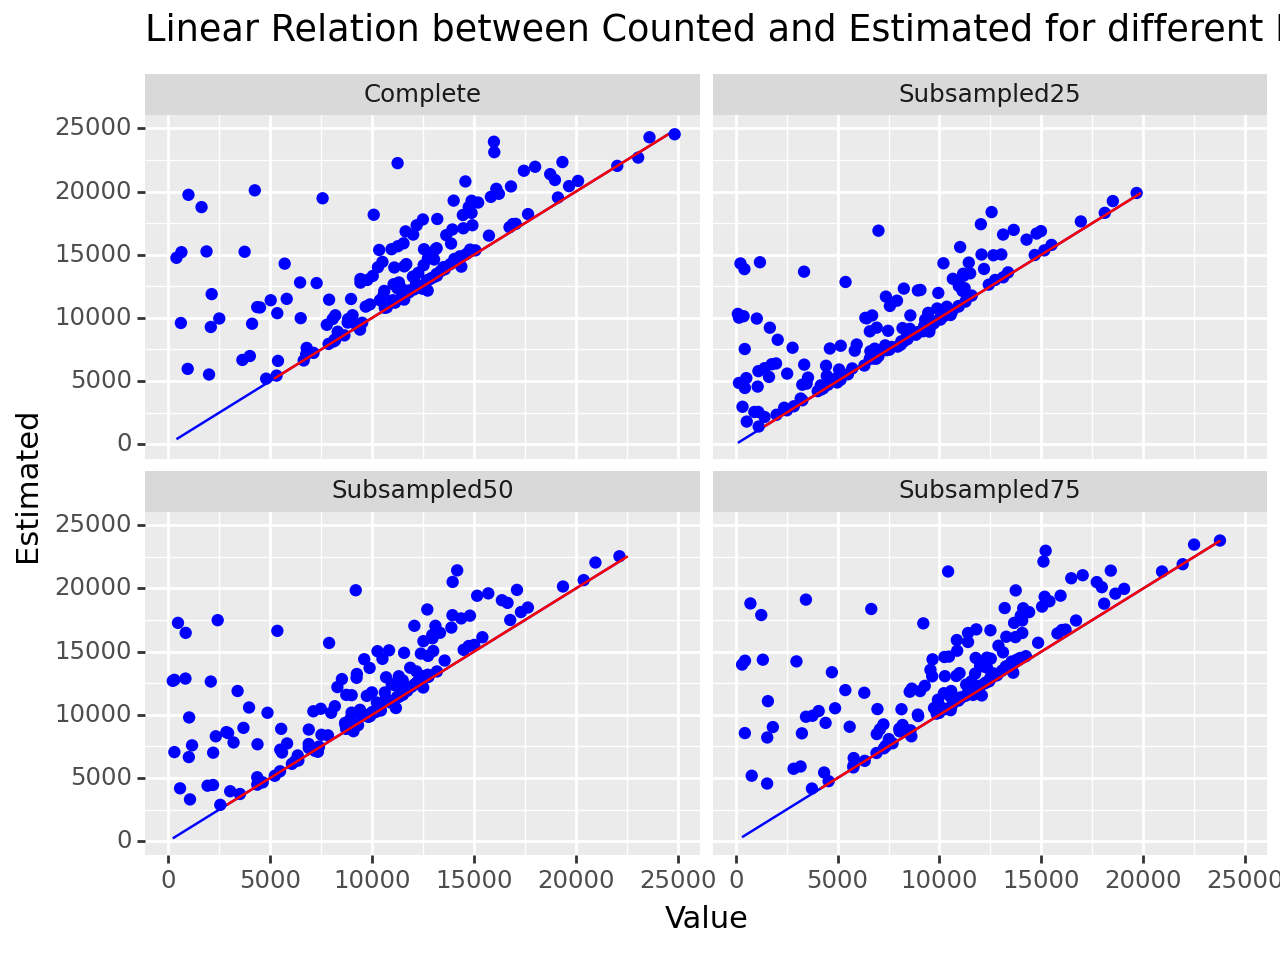

In [87]:
# Define ggplot object with facets
p = (
    ggplot(df) +
    aes(x='Counted', y='Estimated') +
    geom_point(color='blue') +
    geom_line(aes(x='Counted', y='Counted'), color='blue') +
    geom_line(aes(x='Estimated', y='Estimated'), color='red') +
    facet_wrap('~Label') +
    labs(title='Linear Relation between Counted and Estimated for different Labels', x='Value', y='Estimated')
)

# Show the plot
print(p)

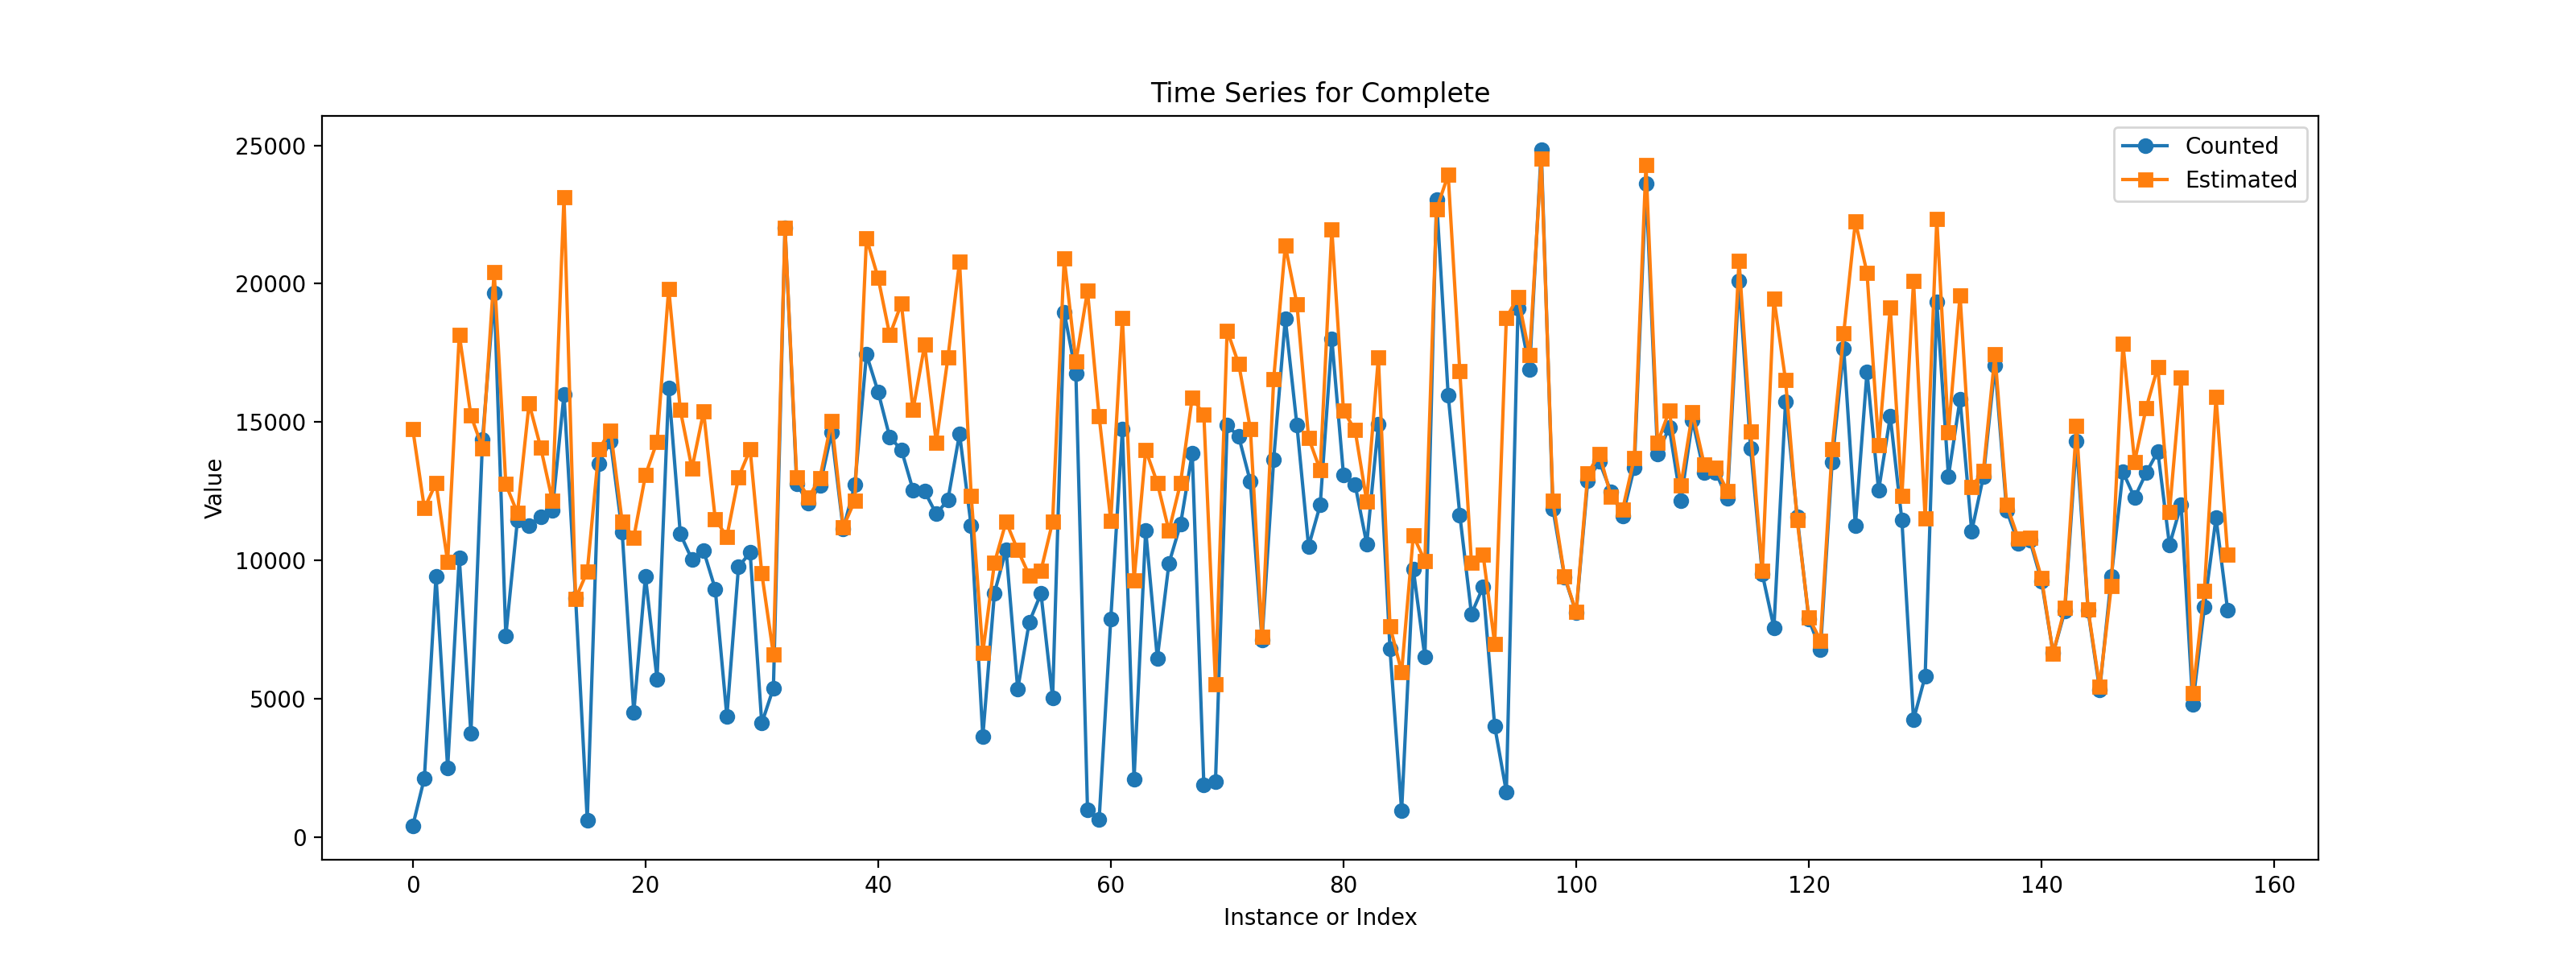

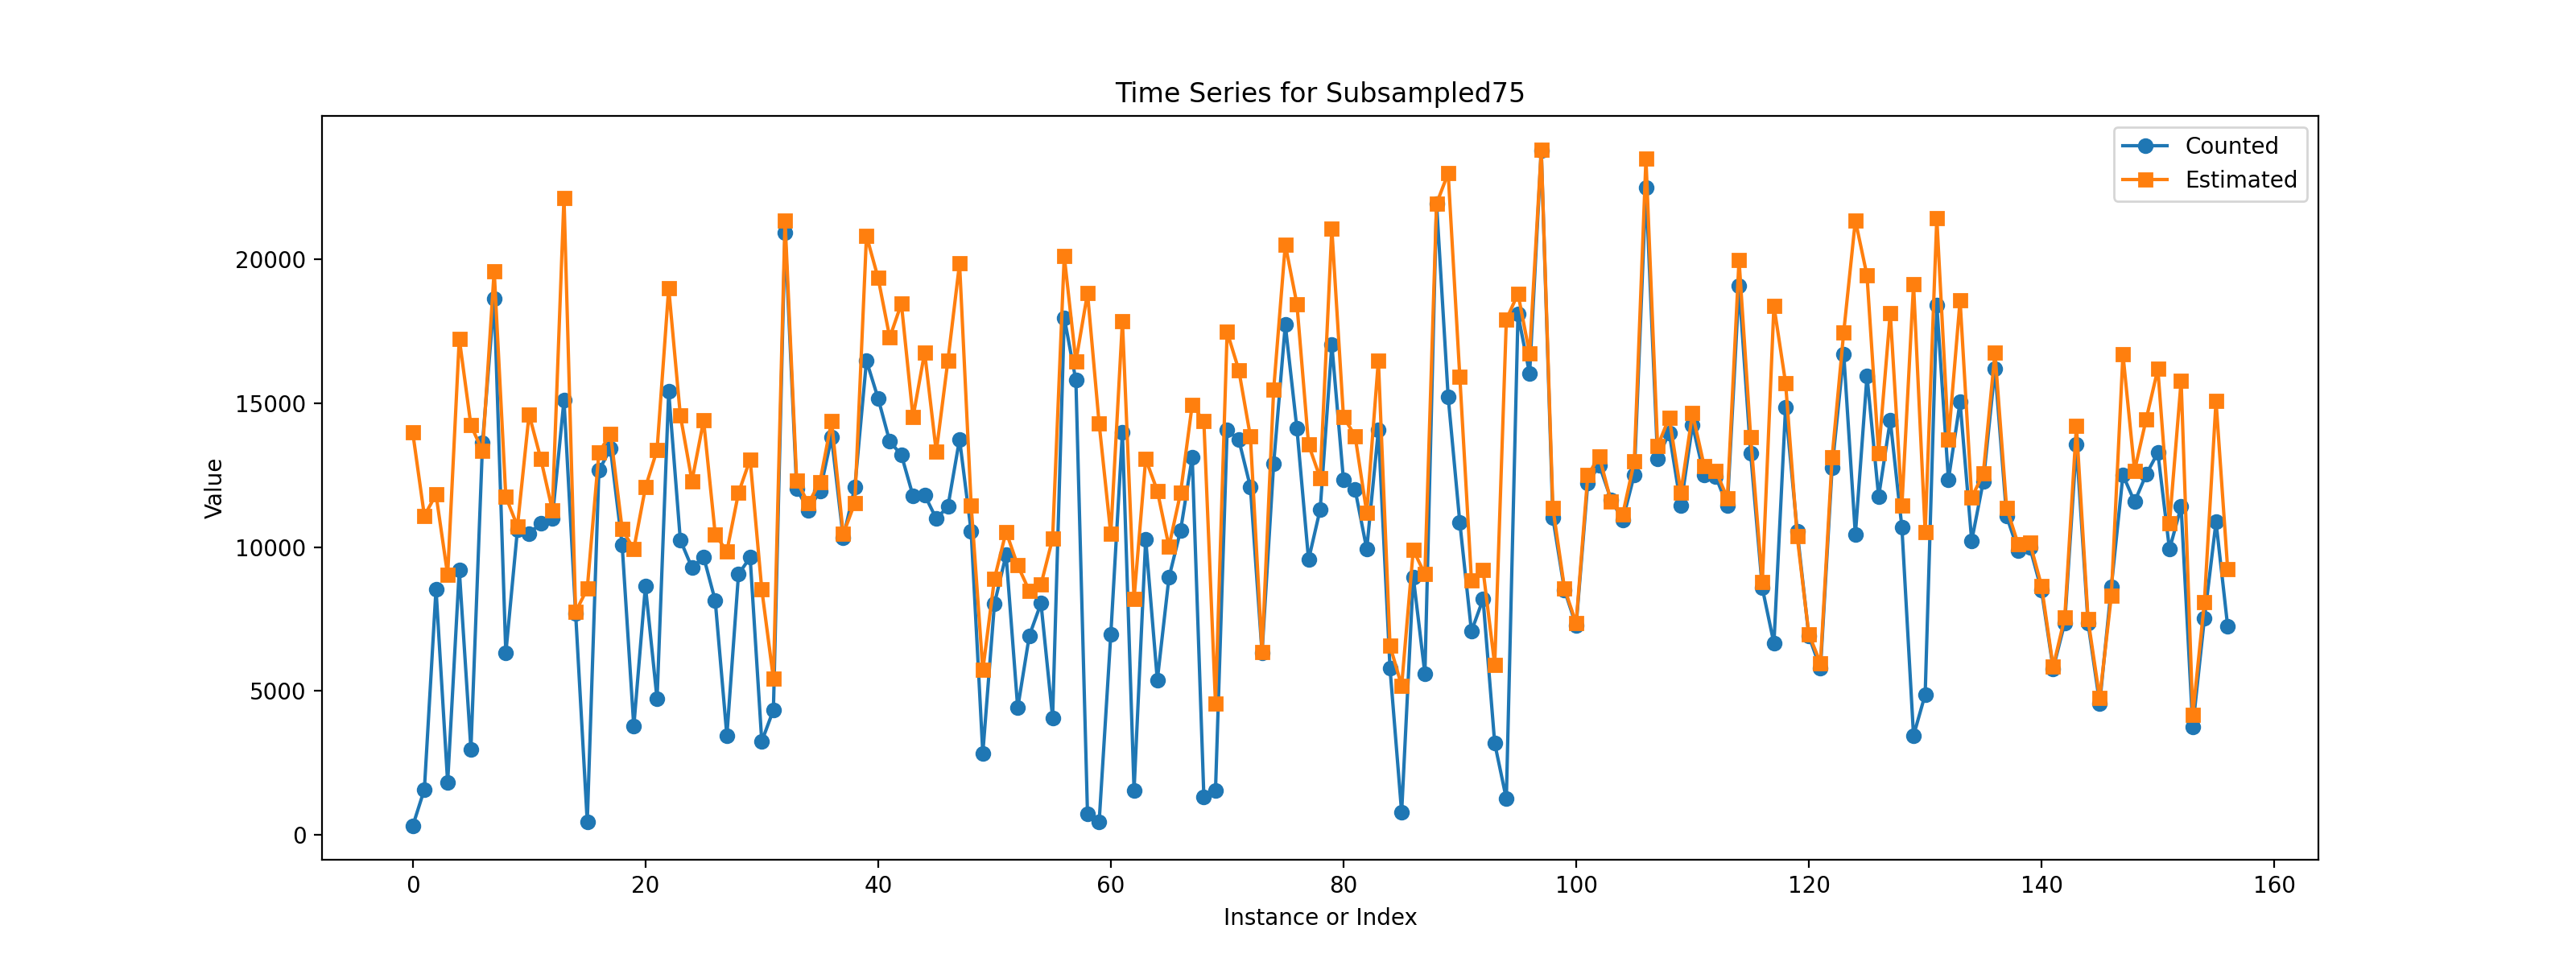

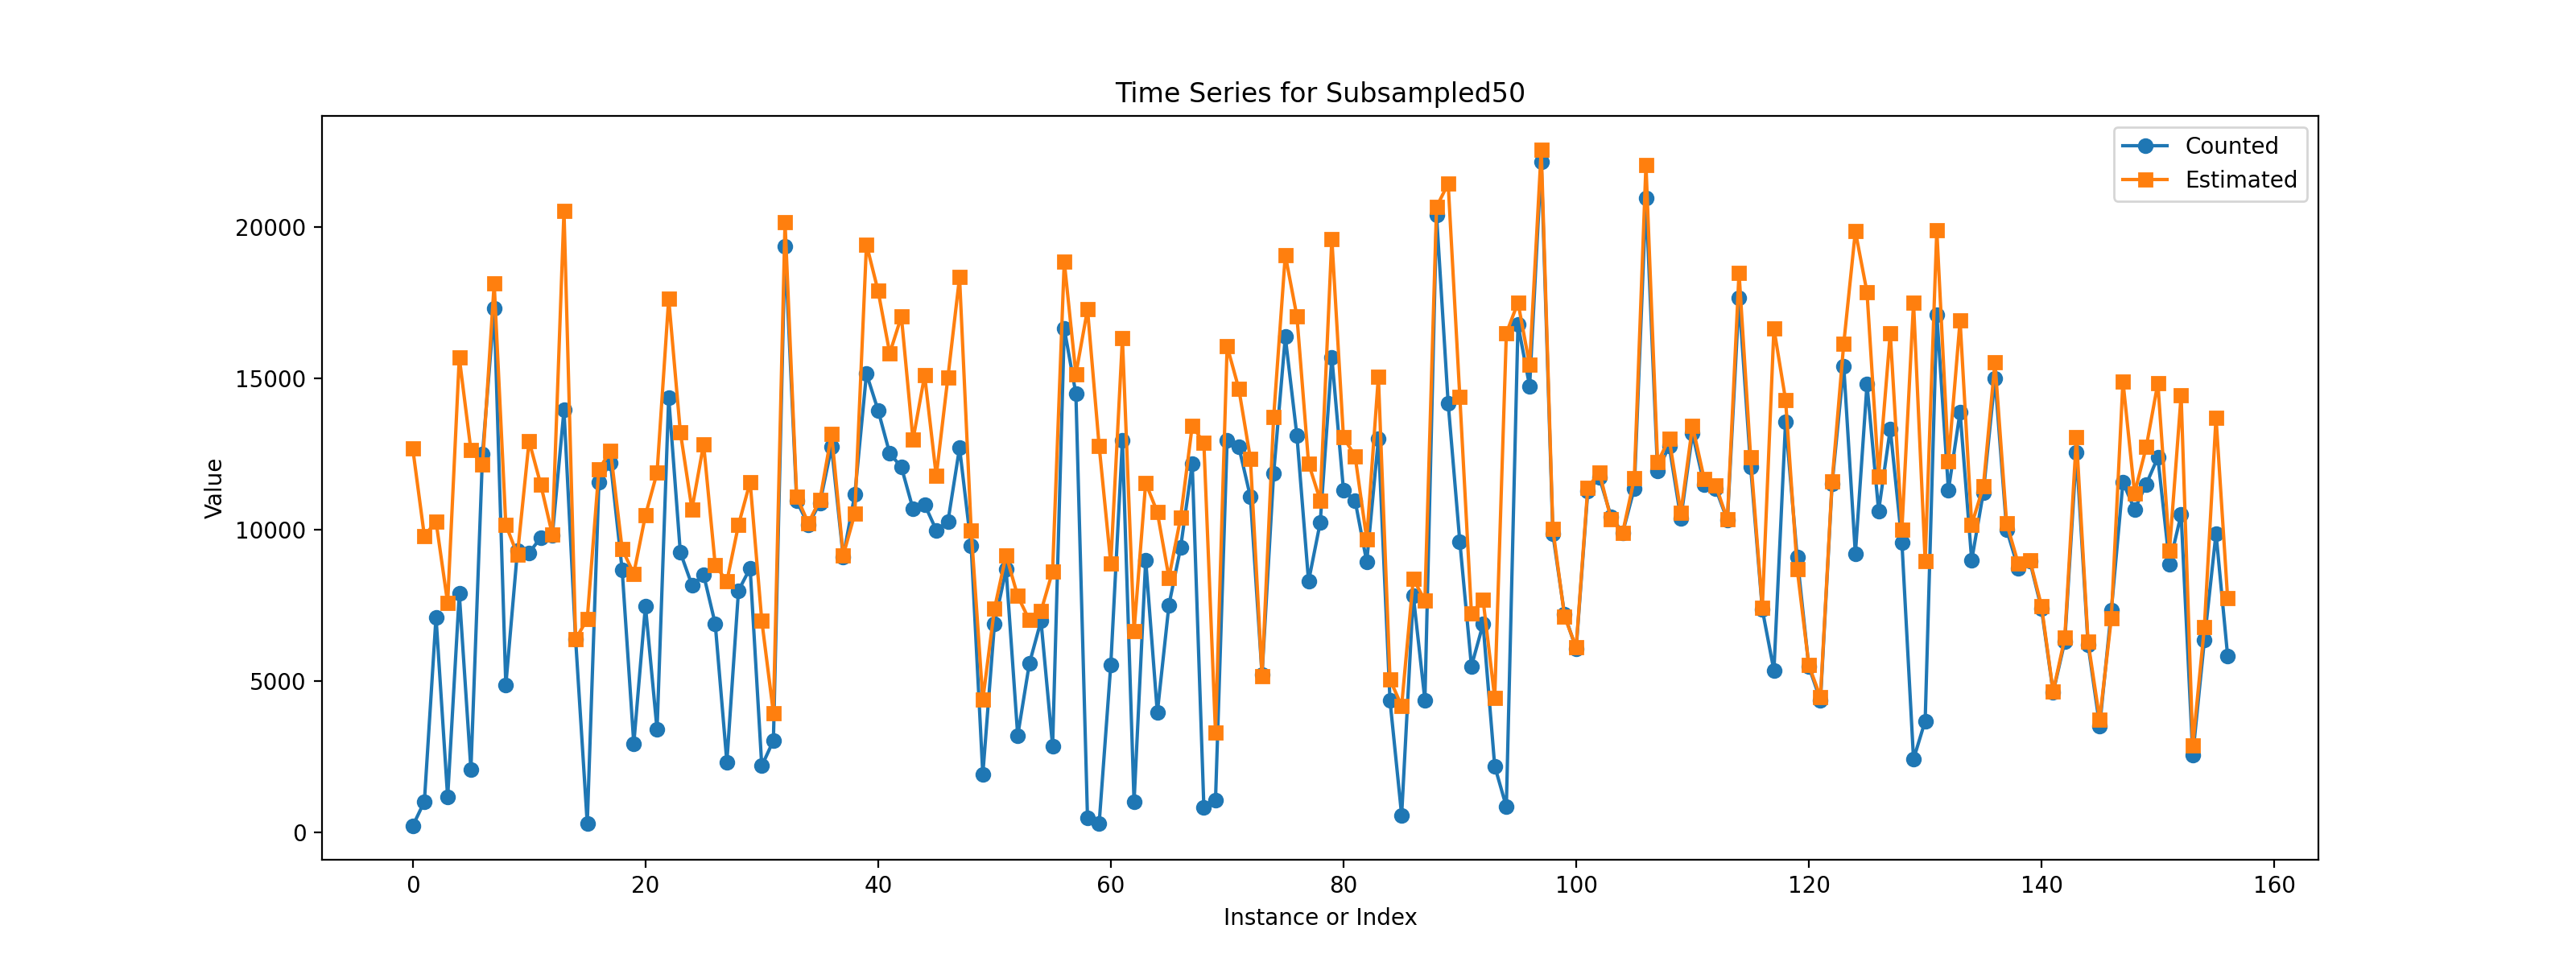

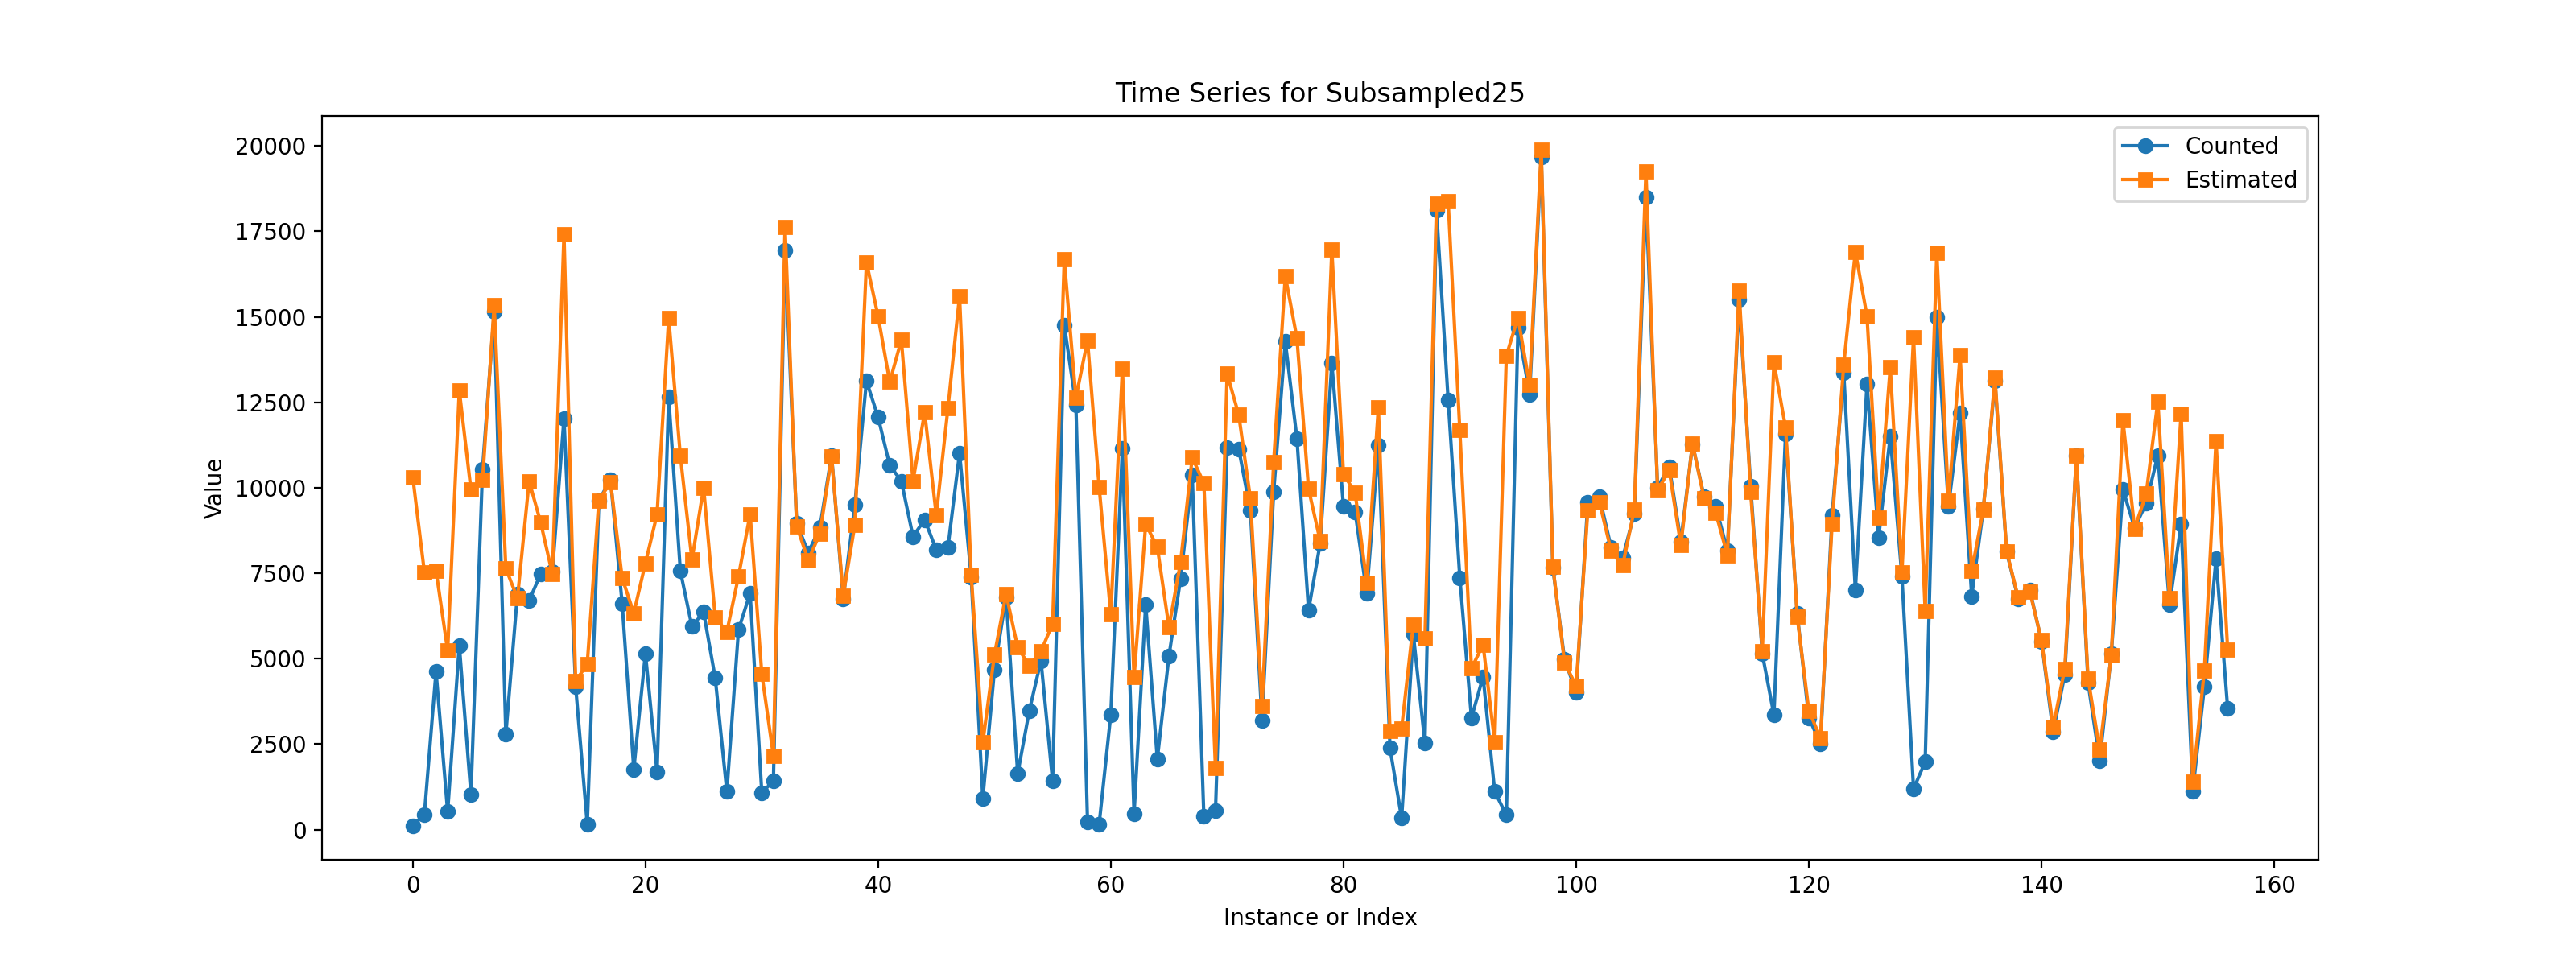

In [95]:
data_str = """
400 14755,
315 13975,
220 12685,
108 10315,
2128 11882,
1583 11080,
1023 9791,
446 7536,
9429 12791,
8540 11826,
7117 10278,
4623 7578,
2501 9952,
1825 9028,
1165 7583,
523 5234,
10080 18163,
9207 17236,
7890 15686,
5392 12842,
3745 15234,
2983 14227,
2085 12631,
1038 9947,
14378 14056,
13620 13332,
12507 12160,
10549 10230,
19664 20428,
18631 19587,
17303 18132,
15146 15343,
7278 12755,
6311 11744,
4868 10160,
2792 7639,
11461 11706,
10603 10721,
9311 9176,
6892 6768,
11262 15670,
10467 14606,
9238 12928,
6698 10194,
11578 14079,
10827 13074,
9739 11498,
7482 8978,
11814 12164,
11002 11282,
9818 9836,
7541 7478,
15995 23116,
15103 22129,
13952 20518,
12031 17415,
8640 8618,
7699 7746,
6382 6385,
4193 4335,
617 9596,
453 8552,
297 7049,
162 4850,
13505 14013,
12657 13273,
11567 11989,
9625 9630,
14313 14700,
13414 13932,
12221 12608,
10242 10163,
11022 11398,
10062 10619,
8673 9359,
6610 7360,
4501 10826,
3767 9922,
2934 8551,
1766 6332,
9427 13079,
8641 12069,
7482 10478,
5156 7794,
5710 14293,
4722 13369,
3400 11883,
1678 9222,
16221 19822,
15396 18984,
14370 17627,
12647 14957,
10953 15436,
10244 14574,
9252 13229,
7568 10944,
10032 13319,
9281 12291,
8173 10678,
5940 7893,
10349 15376,
9661 14390,
8518 12826,
6364 10006,
8966 11497,
8136 10442,
6893 8833,
4435 6211,
4363 10854,
3451 9847,
2331 8298,
1117 5786,
9764 13003,
9052 11877,
7991 10159,
5844 7408,
10286 14010,
9643 13044,
8734 11577,
6922 9230,
4111 9537,
3250 8533,
2201 7002,
1081 4564,
5382 6597,
4341 5434,
3037 3951,
1420 2156,
22030 22032,
20920 21344,
19366 20153,
16937 17633,
12774 13004,
12020 12310,
10949 11101,
8964 8879,
12066 12260,
11285 11510,
10168 10220,
8101 7880,
12698 12983,
11935 12255,
10886 10986,
8843 8666,
14618 15050,
13804 14370,
12733 13169,
10946 10905,
11126 11206,
10315 10448,
9101 9150,
6752 6852,
12726 12162,
12077 11532,
11167 10535,
9503 8912,
17448 21646,
16467 20807,
15154 19423,
13122 16595,
16095 20217,
15162 19342,
13942 17884,
12064 15016,
14453 18141,
13662 17274,
12517 15826,
10657 13094,
14002 19282,
13201 18449,
12073 17044,
10195 14324,
12546 15434,
11776 14501,
10686 12969,
8572 10197,
12492 17792,
11807 16761,
10831 15100,
9067 12211,
11677 14255,
10985 13301,
9988 11774,
8187 9191,
12187 17328,
11402 16473,
10265 15033,
8252 12320,
14578 20800,
13742 19846,
12708 18336,
11015 15609,
11242 12345,
10536 11448,
9461 9987,
7392 7444,
3636 6671,
2842 5727,
1926 4388,
917 2556,
8822 9905,
8029 8897,
6890 7385,
4676 5115,
10382 11397,
9732 10531,
8699 9163,
6797 6895,
5347 10373,
4413 9360,
3202 7810,
1637 5327,
7777 9454,
6923 8475,
5579 7015,
3483 4799,
8803 9631,
8046 8696,
6991 7309,
4945 5219,
5025 11396,
4074 10297,
2850 8629,
1422 6020,
18972 20916,
17966 20098,
16645 18858,
14765 16676,
16743 17179,
15789 16441,
14492 15139,
12421 12631,
989 19740,
724 18813,
475 17277,
235 14309,
644 15201,
458 14281,
300 12766,
163 10018,
7890 11442,
6957 10451,
5539 8889,
3362 6300,
14742 18776,
13989 17842,
12950 16315,
11163 13494,
2085 9280,
1549 8204,
1008 6652,
453 4453,
11090 13989,
10266 13056,
8997 11553,
6584 8937,
6467 12802,
5382 11955,
3963 10578,
2064 8268,
9894 11066,
8939 10016,
7515 8418,
5076 5918,
11314 12806,
10577 11882,
9405 10393,
7339 7825,
13875 15885,
13118 14945,
12173 13435,
10363 10883,
1875 15260,
1335 14361,
842 12868,
389 10133,
1999 5519,
1544 4560,
1064 3304,
544 1795,
14880 18310,
14059 17465,
12961 16059,
11179 13331,
14474 17092,
13728 16148,
12744 14662,
11133 12132,
12841 14748,
12084 13838,
11086 12353,
9331 9681,
7126 7232,
6334 6356,
5224 5171,
3191 3616,
13638 16547,
12895 15465,
11870 13723,
9890 10745,
18738 21376,
17719 20501,
16369 19069,
14274 16193,
14882 19272,
14109 18431,
13106 17044,
11439 14377,
10506 14432,
9558 13556,
8297 12194,
6421 9966,
12001 13263,
11312 12391,
10234 10970,
8379 8440,
17999 21961,
17029 21047,
15702 19610,
13644 16966,
13101 15408,
12326 14522,
11310 13051,
9448 10397,
12737 14709,
11993 13854,
10963 12431,
9301 9864,
10596 12135,
9926 11191,
8939 9692,
6917 7226,
14922 17333,
14064 16477,
12999 15049,
11237 12352,
6790 7624,
5792 6576,
4363 5057,
2381 2890,
952 5965,
787 5178,
577 4180,
336 2965,
9687 10893,
8958 9900,
7832 8374,
5720 6000,
6497 9980,
5595 9053,
4377 7668,
2528 5591,
23055 22687,
21935 21918,
20383 20659,
18112 18313,
15978 23942,
15211 22983,
14175 21430,
12558 18375,
11645 16843,
10852 15916,
9612 14399,
7372 11684,
8066 9912,
7074 8849,
5494 7240,
3269 4713,
9041 10211,
8190 9195,
6888 7687,
4472 5414,
4002 6982,
3186 5908,
2196 4447,
1110 2557,
1631 18767,
1256 17896,
853 16486,
430 13863,
19118 19527,
18080 18794,
16777 17503,
14675 14977,
16905 17426,
16010 16712,
14740 15443,
12733 13004,
24845 24534,
23764 23794,
22137 22548,
19676 19887,
11872 12149,
11013 11360,
9856 10025,
7656 7701,
9405 9434,
8497 8555,
7202 7143,
4981 4888,
8110 8135,
7274 7351,
6064 6116,
4026 4202,
12898 13135,
12230 12498,
11270 11393,
9564 9331,
13570 13851,
12831 13136,
11722 11895,
9733 9575,
12467 12312,
11649 11571,
10433 10345,
8263 8164,
11615 11848,
10933 11125,
9908 9902,
7951 7728,
13362 13707,
12512 12974,
11369 11696,
9251 9364,
23611 24297,
22494 23473,
20958 22049,
18507 19245,
13831 14247,
13071 13495,
11936 12224,
10009 9932,
14806 15402,
13965 14499,
12766 13004,
10620 10505,
12154 12700,
11429 11894,
10368 10557,
8429 8316,
15069 15345,
14240 14640,
13181 13431,
11277 11292,
13163 13479,
12488 12818,
11487 11688,
9731 9687,
13183 13339,
12438 12649,
11355 11460,
9455 9263,
12232 12512,
11435 11697,
10316 10342,
8159 8031,
20106 20843,
19063 19967,
17644 18491,
15500 15775,
14036 14665,
13257 13825,
12074 12394,
10052 9870,
9512 9614,
8581 8771,
7373 7416,
5143 5229,
7571 19467,
6654 18374,
5350 16645,
3356 13659,
15733 16511,
14841 15702,
13560 14294,
11584 11766,
11572 11450,
10551 10366,
9086 8703,
6315 6230,
7866 7941,
6911 6976,
5482 5528,
3273 3478,
6762 7104,
5780 5970,
4365 4471,
2515 2684,
13546 14006,
12755 13105,
11508 11586,
9192 8944,
17651 18215,
16701 17463,
15410 16140,
13365 13602,
11251 22248,
10425 21343,
9198 19856,
7007 16903,
16815 20403,
15942 19427,
14801 17844,
13036 15022,
12529 14170,
11747 13258,
10623 11768,
8548 9133,
15203 19129,
14399 18126,
13332 16490,
11506 13526,
11445 12334,
10678 11442,
9584 10009,
7409 7516,
4245 20095,
3448 19116,
2424 17489,
1193 14405,
5811 11507,
4879 10518,
3687 8967,
1982 6394,
19339 22334,
18407 21411,
17109 19886,
14980 16868,
13039 14623,
12334 13729,
11307 12257,
9448 9617,
15828 19578,
15035 18561,
13890 16903,
12186 13874,
11054 12663,
10218 11708,
8992 10171,
6825 7565,
13023 13223,
12285 12564,
11232 11427,
9380 9363,
17048 17440,
16188 16744,
15011 15532,
13127 13212,
11810 12022,
11072 11360,
10010 10220,
8127 8146,
10623 10800,
9862 10088,
8726 8884,
6753 6784,
10722 10830,
9989 10153,
8955 9004,
7006 6965,
9254 9366,
8495 8652,
7392 7482,
5510 5537,
6644 6631,
5776 5837,
4632 4652,
2855 3005,
8157 8275,
7372 7557,
6309 6429,
4530 4711,
14308 14872,
13550 14216,
12548 13068,
10931 10934,
8186 8230,
7352 7492,
6205 6305,
4300 4426,
5312 5432,
4562 4749,
3515 3732,
2006 2334,
9408 9072,
8621 8299,
7340 7073,
5149 5103,
13197 17827,
12501 16688,
11570 14905,
9943 11973,
12265 13564,
11569 12654,
10666 11206,
8828 8808,
13166 15518,
12520 14443,
11502 12727,
9544 9823,
13939 16998,
13280 16178,
12392 14843,
10949 12526,
10551 11749,
9917 10815,
8871 9312,
6580 6764,
12015 16595,
11402 15764,
10508 14428,
8942 12173,
4801 5189,
3742 4164,
2551 2873,
1130 1404,
8313 8903,
7518 8074,
6353 6784,
4176 4661,
11541 15900,
10869 15070,
9879 13709,
7916 11361,
8196 10204,
7252 9242,
5829 7732,
3550 5275
"""

data = []

# Processing input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue  
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    data.append((instance, counted, estimated, label))


# Create DataFrame
df = pd.DataFrame(data, columns=['Time', 'Counted', 'Estimated', 'Label'])

# Plotting
for label in labels:
    subset = df[df['Label'] == label]
    plt.figure(figsize=(16,6))
    plt.plot(subset['Time'], subset['Counted'], label='Counted', marker='o')
    plt.plot(subset['Time'], subset['Estimated'], label='Estimated', marker='s')
    plt.title(f'Time Series for {label}')
    plt.xlabel('Instance or Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [96]:
# Assuming df is your DataFrame and it has a 'Label' column to group by
grouped = df.groupby('Label')
for name, group in grouped:
    print(f"{name} has {len(group)} data points")

Complete has 157 data points
Subsampled25 has 157 data points
Subsampled50 has 157 data points
Subsampled75 has 157 data points


In [97]:
## Summary statistics for "complete", "subsampled75", "subsampled50" and "subsampled25" 

data = []

# Parse the input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    percentage_difference = abs(counted - estimated) / counted * 100 if counted != 0 else 0
    data.append((instance, counted, estimated, percentage_difference, label))

# Create a DataFrame
df = pd.DataFrame(data, columns=['Instance', 'Counted', 'Estimated', 'Percentage Difference', 'Label'])

# Analyzing the differences for each time series
for label in labels:
    print(f"Statistics for {label}:")
    subset = df[df['Label'] == label]
    description = subset['Percentage Difference'].describe()
    print(description)
    print("="*40)

Statistics for Complete:
count     157.000000
mean      107.562668
std       397.880148
min         0.009079
25%         2.905425
50%        14.524349
75%        38.119018
max      3588.750000
Name: Percentage Difference, dtype: float64
Statistics for Subsampled75:
count     157.000000
mean      132.084167
std       500.235951
min         0.077502
25%         3.735066
50%        14.515061
75%        39.671334
max      4336.507937
Name: Percentage Difference, dtype: float64
Statistics for Subsampled50:
count     157.000000
mean      172.353283
std       673.213432
min         0.047007
25%         3.166680
50%        13.111655
75%        40.042769
max      5665.909091
Name: Percentage Difference, dtype: float64
Statistics for Subsampled25:
count     157.000000
mean      267.119052
std      1082.587247
min         0.027445
25%         1.799187
50%        11.613985
75%        44.751060
max      9450.925926
Name: Percentage Difference, dtype: float64


In [98]:
## Just for checking whether the acquired data is correctly parsed

# Parse the input data
for i, line in enumerate(data_str.strip().split('\n')):
    parts = line.replace(',', '').split()
    if len(parts) != 2:
        print(f"Unexpected number of values on line {i+1}: {line}")
        continue
    counted, estimated = map(int, parts)
    label = labels[i % 4]
    instance = i // 4
    print(f"{label}: {counted} {estimated}")

Complete: 400 14755
Subsampled75: 315 13975
Subsampled50: 220 12685
Subsampled25: 108 10315
Complete: 2128 11882
Subsampled75: 1583 11080
Subsampled50: 1023 9791
Subsampled25: 446 7536
Complete: 9429 12791
Subsampled75: 8540 11826
Subsampled50: 7117 10278
Subsampled25: 4623 7578
Complete: 2501 9952
Subsampled75: 1825 9028
Subsampled50: 1165 7583
Subsampled25: 523 5234
Complete: 10080 18163
Subsampled75: 9207 17236
Subsampled50: 7890 15686
Subsampled25: 5392 12842
Complete: 3745 15234
Subsampled75: 2983 14227
Subsampled50: 2085 12631
Subsampled25: 1038 9947
Complete: 14378 14056
Subsampled75: 13620 13332
Subsampled50: 12507 12160
Subsampled25: 10549 10230
Complete: 19664 20428
Subsampled75: 18631 19587
Subsampled50: 17303 18132
Subsampled25: 15146 15343
Complete: 7278 12755
Subsampled75: 6311 11744
Subsampled50: 4868 10160
Subsampled25: 2792 7639
Complete: 11461 11706
Subsampled75: 10603 10721
Subsampled50: 9311 9176
Subsampled25: 6892 6768
Complete: 11262 15670
Subsampled75: 10467 1460

In [108]:
number_complete_instances = len(df[(df['Label'] == 'Complete')])
number_complete_5percent  = len(df[(df['Label'] == 'Complete') & (df['Percentage Difference'] < 5)])
print(f"number of complete instances {number_complete_instances}")
print(f"number of complete instances with deviation less than 5%: {number_complete_5percent}/{number_complete_instances} = {(number_complete_5percent/number_complete_instances)*100:.2f}%")

number of complete instances 157
number of complete instances with deviation less than 5%: 57/157 = 36.31%


In [109]:
df[(df['Label'] == 'Complete') & (df['Percentage Difference'] < 5)]

,Instance,Counted,Estimated,Percentage Difference,Label
24,6,14378,14056,2.239533,Complete
28,7,19664,20428,3.885273,Complete
36,9,11461,11706,2.137684,Complete
48,12,11814,12164,2.962587,Complete
56,14,8640,8618,0.254630,Complete
64,16,13505,14013,3.761570,Complete
68,17,14313,14700,2.703836,Complete
72,18,11022,11398,3.411359,Complete
128,32,22030,22032,0.009079,Complete
132,33,12774,13004,1.800532,Complete
